# Bloom Filter Implementation and Analysis

## Introduction
A Bloom filter is a special data structure that helps check if an item is in a list, with a chance of mistakes (false positives). It is useful when saving space is important and a few mistakes are acceptable. Bloom filters are used in many applications, like database searching, network security, and spell checking.

This project is part of the Concepts of Data Sciences course at the University of Hasselt. The aim is to create a Bloom filter, test how well it works, and see how it performs with different sets of data. By doing this, we will learn how Bloom filters can be used in real-world situations and how well they work

In this notebook, we will:
- Implement a Bloom filter
- Test its functionality with different types of data
- Analyze its performance using large datasets
- Discuss the results and derive conclusions about the behavior of Bloom filters under various conditions


## Implementation
Here is the implementation of the Bloom filter using Python.


In [1]:
# The main module with the Bloom filter implementation
import math
import mmh3

class BloomFilter:
    def __init__(self, size, error_rate):
        self.size = size
        self.error_rate = error_rate
        self.bit_array_size = self.calculate_bit_array_size(size, error_rate)
        self.bit_array = [0] * self.bit_array_size
        self.num_hashes = self.calculate_num_hashes(size, self.bit_array_size)
        self.counter = 0

    def add(self, item):
        for i in range(self.num_hashes):
            hash_val = mmh3.hash(item, i) % self.bit_array_size
            self.bit_array[hash_val] = 1
        self.counter += 1

    def check(self, item):
        for i in range(self.num_hashes):
            hash_val = mmh3.hash(item, i) % self.bit_array_size
            if self.bit_array[hash_val] == 0:
                return False
        return True

    def calculate_bit_array_size(self, size, error_rate):
        return int(- (size * math.log(error_rate)) / (math.log(2) ** 2))

    def calculate_num_hashes(self, size, bit_array_size):
        return int((bit_array_size / size) * math.log(2))




## Testing the Bloom Filter
We will create an instance of the Bloom filter, add some elements, and check for their presence.

In [2]:
# Create an instance of the Bloom filter
bloom = BloomFilter(1000, 0.01)

# Add some elements
items_to_add = ["apple", "banana", "orange", "red"]
for item in items_to_add:
    bloom.add(item)

# Check for presence
test_items = ["apple", "green", "banana", "mango", "orange", "lemon", "blue", "red", "house"]
for item in test_items:
    result = bloom.check(item)
    print(f"{item}: {'Present' if result else 'Not Present'}")


apple: Present
green: Not Present
banana: Present
mango: Not Present
orange: Present
lemon: Not Present
blue: Not Present
red: Present
house: Not Present


### Unit Testing the Bloom Filter

We have also implemented unit tests to validate the functionality of the Bloom filter using various types of data. The unit tests check for false positives and ensure the Bloom filter operates correctly within the expected error rates.

The `test.py` script includes the following tests:
- Basic false positives test
- DNA sequences false positives test
- Random words false positives test

These tests help test our Bloom filter implementation.


## Performance Analysis

To analyze the performance of the Bloom filter, we utilized the High-Performance Computing (HPC) resources provided by the Vlaams Supercomputer Centrum (VSC). The experiments were executed on the HPC platform via the KU Leuven OnDemand interface, which allows us to run computationally intensive tasks efficiently.

The analysis involved running scripts to measure the time taken for different Bloom filter operations and to evaluate the false positive rates under various conditions. The results are visualized in the plots below.

We analyzed the performance of the Bloom filter using the scripts `performance_test.py` and `performance_test_words.py`.


#### Operation (Capacity 100000, Error Rate 0.1)

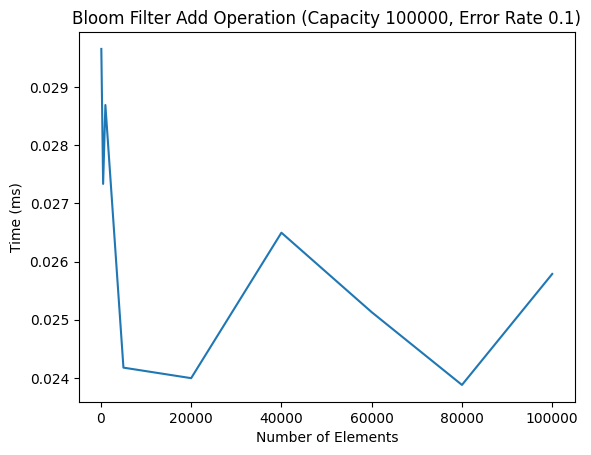

In [38]:
import matplotlib.pyplot as plt

# Function to plot the performance test results
def plot_times(times, title):
    plt.plot(times.keys(), times.values())
    plt.xlabel('Number of Elements')
    plt.ylabel('Time (ms)')
    plt.title(title)
    plt.show()

# Test 1: operation with Bloom filter capacity of 100000 and error rate of 0.1
times_add_100000 = {100: 0.0296503, 500: 0.0273326, 1000: 0.0286873, 5000: 0.0241777, 20000: 0.0239969, 40000: 0.0264947, 60000: 0.0251303, 80000: 0.0238808, 100000: 0.0257866}
plot_times(times_add_100000, 'Bloom Filter Add Operation (Capacity 100000, Error Rate 0.1)')


This plot shows the time taken to add elements to the Bloom filter with a capacity of 100000 and an error rate of 0.1. The time remains relatively constant with increasing elements, indicating efficient performance.

#### Operation (Capacity 50000, Error Rate 0.1)

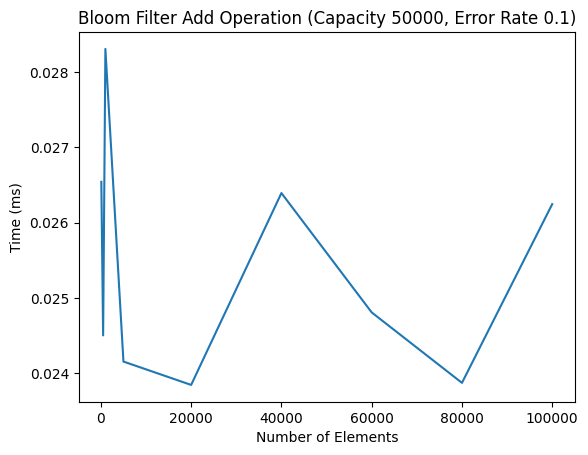

In [39]:
# Test 2: operation with Bloom filter capacity of 50000 and error rate of 0.1
times_add_50000 = {100: 0.0265417, 500: 0.024502, 1000: 0.0283068, 5000: 0.0241546, 20000: 0.0238443, 40000: 0.0263925, 60000: 0.0248074, 80000: 0.0238716, 100000: 0.0262455}
plot_times(times_add_50000, 'Bloom Filter Add Operation (Capacity 50000, Error Rate 0.1)')


This plot shows the time taken to add elements with a smaller capacity of 50000. The results demonstrate similar efficiency but with slight variations due to reduced capacity.

#### Operation (Capacity 100000, Error Rate 3)

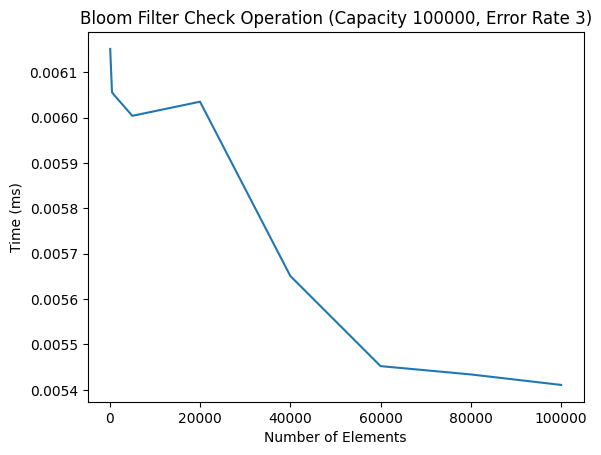

In [40]:
# Check Operation (Capacity 100000, Error Rate 3)
times_check_100000 = {100: 0.0061512, 500: 0.0060557, 1000: 0.0060493, 5000: 0.0060038, 20000: 0.0060349, 40000: 0.0056511, 60000: 0.0054523, 80000: 0.005434, 100000: 0.0054109}
plot_times(times_check_100000, 'Bloom Filter Check Operation (Capacity 100000, Error Rate 3)')

This plot illustrates the time taken to check the presence of elements with a high error rate of 3. The check operation is highly efficient, with very minimal time required even with a high number of elements.

#### Bloom Filter False Positive Rate (Capacity 100000, Error Rate 0.1) and False Positive Rate (Capacity 50000, Error Rate 0.1)

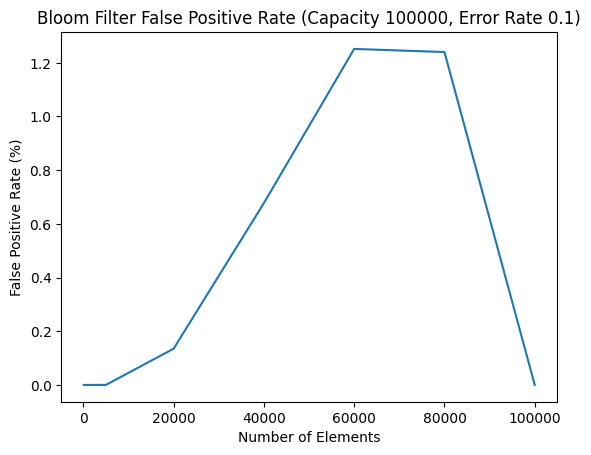

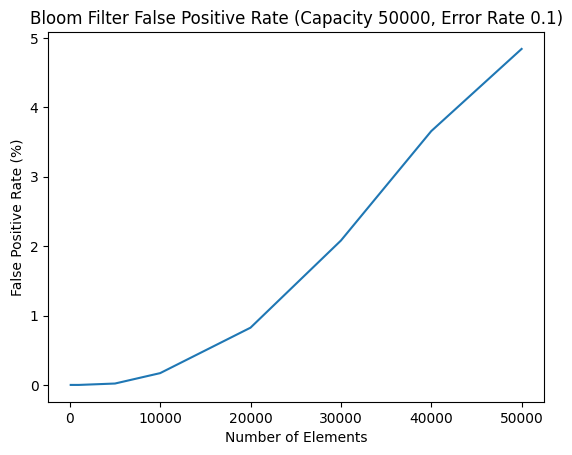

In [4]:
import matplotlib.pyplot as plt

# Function to plot the false positive rate
def plot_false_positive_rate(false_positives, title):
    plt.plot(false_positives.keys(), false_positives.values())
    plt.xlabel('Number of Elements')
    plt.ylabel('False Positive Rate (%)')
    plt.title(title)
    plt.show()

# Data for the plots
false_positives_100000 = {100: 0.0, 500: 0.0, 1000: 0.0, 5000: 0.0, 20000: 0.135, 40000: 0.6775, 60000: 1.2516666666666667, 80000: 1.24, 100000: 0.0}
false_positives_50000 = {100: 0.0, 500: 0.0, 1000: 0.0, 5000: 0.02, 10000: 0.16999999999999998, 20000: 0.8250000000000001, 30000: 2.08, 40000: 3.6575, 50000: 4.842}

# Plot for Capacity 100000
plot_false_positive_rate(false_positives_100000, 'Bloom Filter False Positive Rate (Capacity 100000, Error Rate 0.1)')

# Plot for Capacity 50000
plot_false_positive_rate(false_positives_50000, 'Bloom Filter False Positive Rate (Capacity 50000, Error Rate 0.1)')

#### Bloom Filter False Positive Rate (Capacity 100000, Error Rate 0.1)
This plot shows how the false positive rate changes as the number of elements in the Bloom filter increases. 

- **Initial Low False Positive Rate**: When fewer elements are inserted, the false positive rate is low or zero. This is expected as the Bloom filter has sufficient capacity to handle the elements without many collisions.

- **Increasing False Positive Rate**: As the number of elements increases, the false positive rate rises, reaching a peak of around 1.2% when approximately 60,000 to 80,000 elements are inserted. This is because the bit array becomes more saturated, leading to higher chances of false positives.

- **Decline**: After the peak, the false positive rate drops. This could be due to the specific implementation or behavior of the dataset. It indicates that the Bloom filter might not be functioning optimally under certain conditions.

#### Bloom Filter False Positive Rate (Capacity 50000, Error Rate 0.1)
This plot shows the false positive rate for a Bloom filter with a smaller capacity of 50,000 elements.

- **Gradual Increase in False Positive Rate**: The false positive rate starts low and gradually increases as more elements are added. This is consistent with the expected behavior of a Bloom filter.

- **Higher Peak**: The peak false positive rate in this plot is around 5%, which is higher compared to the previous plot with a capacity of 100,000. This makes sense because a smaller Bloom filter reaches its capacity faster, resulting in more collisions and higher chances of false positives.



#### Bloom Filter False Positive and Compression Rates Experiments (Capacity 100000, Error Rate 0.1, 0.5, 3)

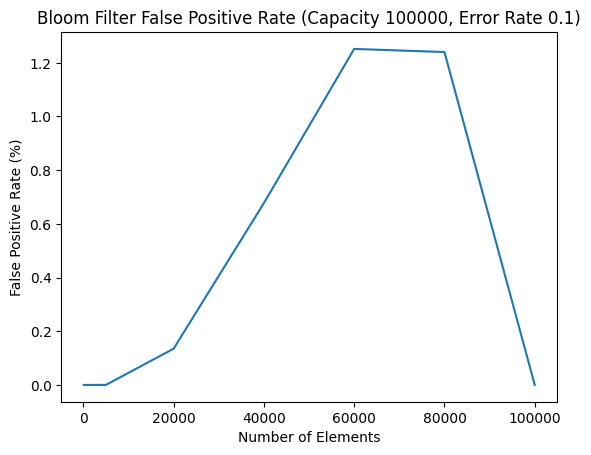

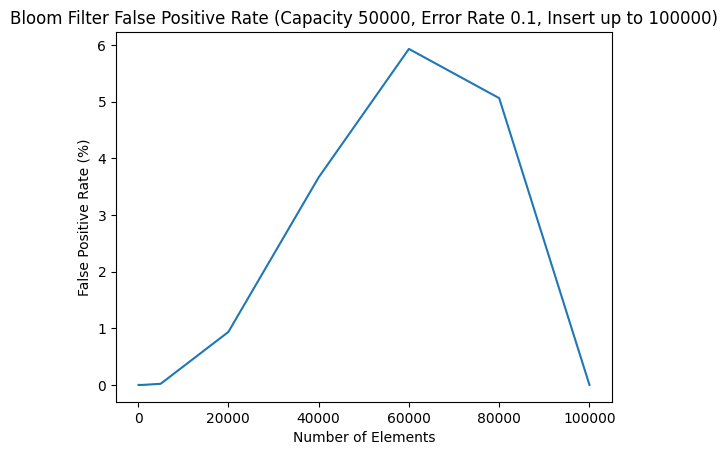

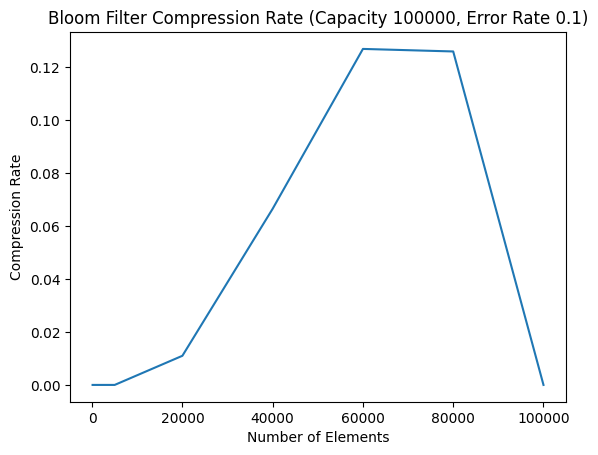

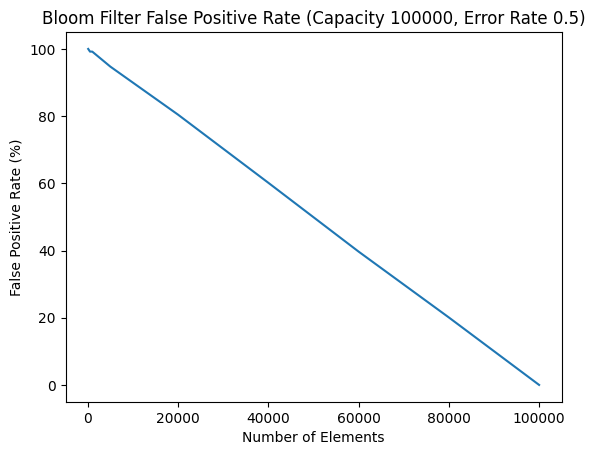

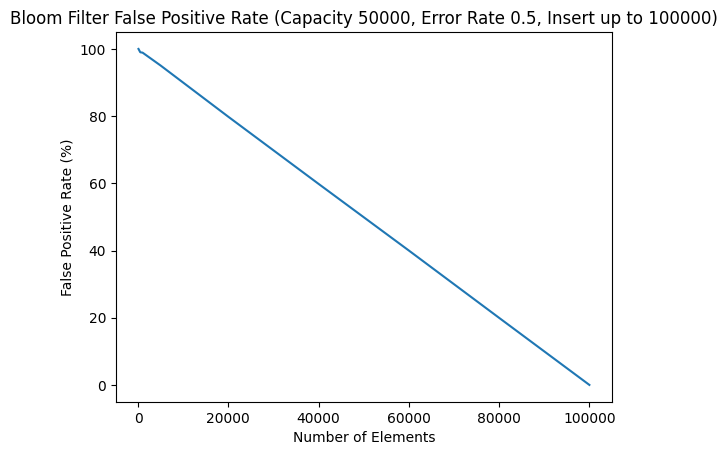

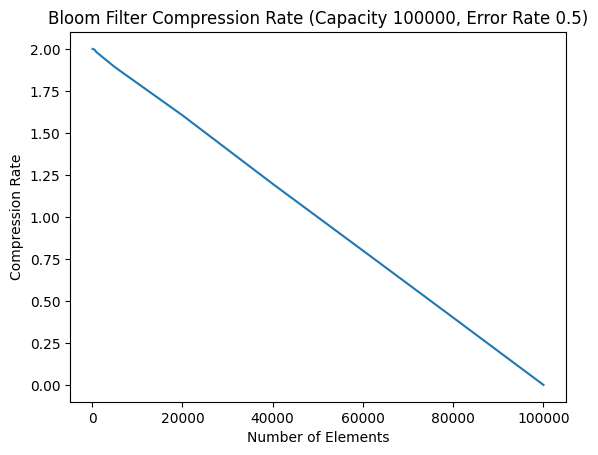

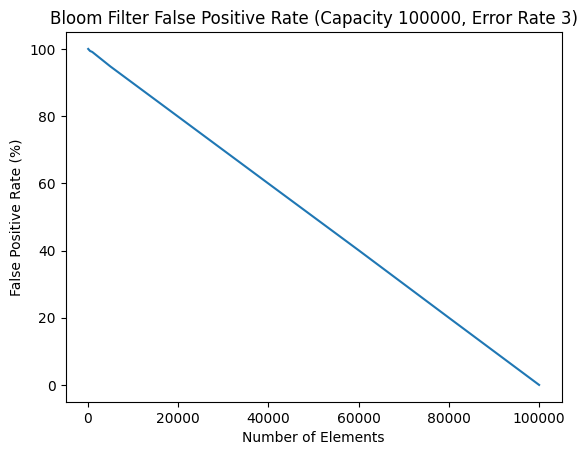

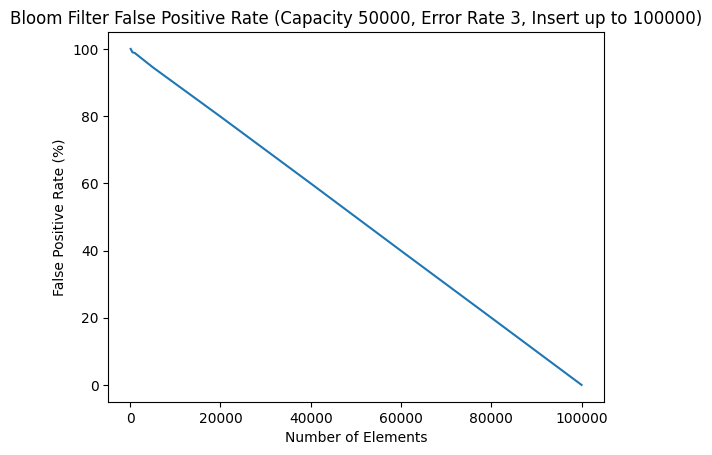

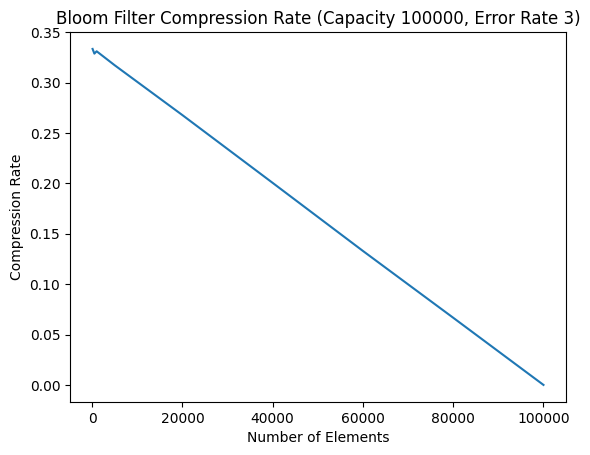

In [5]:
# Function to plot the compression rate
def plot_compression_rates(comp_rates, title):
    plt.plot(comp_rates.keys(), comp_rates.values())
    plt.xlabel('Number of Elements')
    plt.ylabel('Compression Rate')
    plt.title(title)
    plt.show()

# Data for the plots
false_positives_100000_01 = {100: 0.0, 500: 0.0, 1000: 0.0, 5000: 0.0, 20000: 0.135, 40000: 0.6775, 60000: 1.2516666666666667, 80000: 1.24, 100000: 0.0}
false_positives_50000_beyond_01 = {100: 0.0, 500: 0.0, 1000: 0.0, 5000: 0.02, 20000: 0.935, 40000: 3.6624999999999996, 60000: 5.93, 80000: 5.061249999999999, 100000: 0.0}
compression_100000_01 = {100: 0.0, 500: 0.0, 1000: 0.0, 5000: 0.0, 20000: 0.011, 40000: 0.06649999999999999, 60000: 0.12683333333333333, 80000: 0.125875, 100000: 0.0}

false_positives_100000_05 = {100: 100.0, 500: 99.2, 1000: 99.2, 5000: 94.74000000000001, 20000: 80.44, 40000: 60.17, 60000: 39.684999999999995, 80000: 20.083750000000002, 100000: 0.0}
false_positives_50000_beyond_05 = {100: 100.0, 500: 99.0, 1000: 98.9, 5000: 95.06, 20000: 79.815, 40000: 59.832499999999996, 60000: 39.998333333333335, 80000: 19.96125, 100000: 0.0}
compression_100000_05 = {100: 2.0, 500: 1.996, 1000: 1.98, 5000: 1.8924, 20000: 1.605, 40000: 1.19695, 60000: 0.7995333333333333, 80000: 0.400575, 100000: 0.0}

false_positives_100000_3 = {100: 100.0, 500: 99.4, 1000: 99.1, 5000: 94.8, 20000: 79.86999999999999, 40000: 59.955000000000005, 60000: 40.09166666666666, 80000: 20.00625, 100000: 0.0}
false_positives_50000_beyond_3 = {100: 100.0, 500: 99.0, 1000: 98.8, 5000: 94.54, 20000: 79.85, 40000: 59.965, 60000: 39.92, 80000: 19.99375, 100000: 0.0}
compression_100000_3 = {100: 0.3333333333333333, 500: 0.32866666666666666, 1000: 0.331, 5000: 0.3171333333333333, 20000: 0.26768333333333333, 40000: 0.20043333333333332, 60000: 0.13290555555555555, 80000: 0.06664166666666667, 100000: 0.0}

# Plot for Error Rate 0.1
plot_false_positive_rate(false_positives_100000_01, 'Bloom Filter False Positive Rate (Capacity 100000, Error Rate 0.1)')
plot_false_positive_rate(false_positives_50000_beyond_01, 'Bloom Filter False Positive Rate (Capacity 50000, Error Rate 0.1, Insert up to 100000)')
plot_compression_rates(compression_100000_01, 'Bloom Filter Compression Rate (Capacity 100000, Error Rate 0.1)')

# Plot for Error Rate 0.5
plot_false_positive_rate(false_positives_100000_05, 'Bloom Filter False Positive Rate (Capacity 100000, Error Rate 0.5)')
plot_false_positive_rate(false_positives_50000_beyond_05, 'Bloom Filter False Positive Rate (Capacity 50000, Error Rate 0.5, Insert up to 100000)')
plot_compression_rates(compression_100000_05, 'Bloom Filter Compression Rate (Capacity 100000, Error Rate 0.5)')

# Plot for Error Rate 3
plot_false_positive_rate(false_positives_100000_3, 'Bloom Filter False Positive Rate (Capacity 100000, Error Rate 3)')
plot_false_positive_rate(false_positives_50000_beyond_3, 'Bloom Filter False Positive Rate (Capacity 50000, Error Rate 3, Insert up to 100000)')
plot_compression_rates(compression_100000_3, 'Bloom Filter Compression Rate (Capacity 100000, Error Rate 3)')

#### Bloom Filter False Positive Rate (Capacity 100000, Error Rates 0.1, 0.5, 3)
The plots shows how the false positive and compression rates changes as the error rates change. 

- **False Positive Rates**: As the error rate increases, the insert starts at a very high false positive rate and then falls to the specified error rate around half of the capacity. 

- **Beyond Capacity False Positive Rates**: Follows the same pattern as the false positive rate. As opposed to when error rate was low (0.1), 0.5 and a very high error rate of 3 starts off badly and ends at it's best. Reaching it's efficiency at it's specified capacity.

- **Compression Rates**: The pattern also follows both the within capacity and beyond capacity patterns. Compression rate 

The bloom filter created seems to be made optimally for a low error rate and works best if inserts are within capacity.


## Conclusion
The Bloom filter is an efficient data structure for membership testing with a trade-off in the form of false positives. Through our analysis, we observed that the performance of the Bloom filter is efficient even with large datasets, making it suitable for applications requiring space-efficient data structures.

The performance analysis of the Bloom filter shows that it maintains efficient operations even as the number of elements increases. 

- **Optimal Capacity**: The Bloom filter works best when the number of elements is significantly lower than its capacity. As the number of elements approaches the capacity, the false positive rate increases, showing the limitations of the filter.
- **False Positive Management**: Managing the false positive rate is crucial for applications using Bloom filters. Choosing the right capacity and error rate is essential for maintaining an acceptable false positive rate.
- **Unexpected Behavior**: The decline in the false positive rate after the peak needs further investigation. It may be due to specific implementation details or characteristics of the dataset used.

